In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [21]:
CBWs         = [   2,   4,   6]
PBWs         = [  10,  16,  20]
CWNDs        = [  64, 128, 256]
TTIME        = 10
NUMEXP       = 20
TPTALGOs     = ['TCPreno','TCPcubic'] #,'UDP']
ATK_PARA     = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
hostnames    = ['atkr'] + [f'h{i}' for i in range(8)]
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

indices      = [('CBW', CBWs), ('PBW', PBWs), ('CWND', CWNDs), ('TPTALGO', TPTALGOs)]

basedir   = f'./NUMEXP-{NUMEXP}_TTIME-{TTIME}'

# unpacking loop to deal with xingyiz zip spam ANNOYING
# for CBW in CBWs:
#     for PBW in PBWs:
#         for CWND in CWNDs:
#             os.system(f'mkdir -p ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'unzip ../results/CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}.zip')
#             os.system(f'mv ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}/* ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'rmdir ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}')

In [4]:
dfall = []
for CBW in CBWs:
    for PBW in PBWs:
        for CWND in CWNDs: 
            for TPTALGO in TPTALGOs:
                for APC in ATK_PARA:
                    for HOST in hostnames:
                        dfi = pd.read_csv(f'{basedir}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/{TPTALGO}/{APC}conn/iperf_{HOST}.csv', names=iperf_header)
                        dfi['host']    = HOST
                        dfi['APC']     = APC
                        dfi['TPTALGO'] = TPTALGO
                        dfi['CWND']    = CWND
                        dfi['PBW']     = PBW
                        dfi['CBW']     = CBW
                        dfall.append(dfi.tail(1))
                        
dfbigboi = pd.concat(dfall)
dfbigboi

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
10,20211121150206,10.0.0.1,39988,10.0.0.10,5001,3,0.0-10.2,1483240,1158859,atkr,1,TCPreno,64,10,2
10,20211121150206,10.0.0.2,44264,10.0.0.10,5001,3,0.0-10.2,1486400,1162645,h0,1,TCPreno,64,10,2
10,20211121150206,10.0.0.3,42682,10.0.0.10,5001,3,0.0-10.3,1424568,1111799,h1,1,TCPreno,64,10,2
10,20211121150206,10.0.0.4,38312,10.0.0.10,5001,3,0.0-10.2,1419040,1111394,h2,1,TCPreno,64,10,2
10,20211121150206,10.0.0.5,47112,10.0.0.10,5001,3,0.0-10.2,1421936,1113934,h3,1,TCPreno,64,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,20211121184323,10.0.0.9,45460,10.0.0.10,5001,3,0.0-10.3,3734488,2913516,h7,19,TCPcubic,256,20,6
241,20211121184337,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.3,17050200,13271305,atkr,21,TCPcubic,256,20,6
10,20211121184336,10.0.0.7,40508,10.0.0.10,5001,3,0.0-10.1,6684672,5316255,h5,21,TCPcubic,256,20,6
10,20211121184336,10.0.0.8,54132,10.0.0.10,5001,3,0.0-10.1,6291456,4998946,h6,21,TCPcubic,256,20,6


In [6]:
df0 = dfbigboi[dfbigboi['APC'] == 7]
# df0[df0['transport'] == ]

In [7]:
df0

,timestamp,src_addr,src_port,dest_addr,dest_port,transferID,interval,transferred_bytes,bits_per_second,host,APC,TPTALGO,CWND,PBW,CBW
87,20211121150246,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.2,3090528,2412497,atkr,7,TCPreno,64,10,2
10,20211121150246,10.0.0.5,47192,10.0.0.10,5001,3,0.0-10.2,2064848,1620573,h3,7,TCPreno,64,10,2
10,20211121150246,10.0.0.6,57194,10.0.0.10,5001,3,0.0-10.2,2073536,1621671,h4,7,TCPreno,64,10,2
10,20211121150246,10.0.0.7,40888,10.0.0.10,5001,3,0.0-10.2,2067744,1622852,h5,7,TCPreno,64,10,2
10,20211121150246,10.0.0.8,54512,10.0.0.10,5001,3,0.0-10.2,2038784,1598872,h6,7,TCPreno,64,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,20211121183440,10.0.0.8,52374,10.0.0.10,5001,3,0.0-10.3,2776960,2149198,h6,7,TCPreno,256,20,6
10,20211121183440,10.0.0.9,43762,10.0.0.10,5001,3,0.0-10.1,2271912,1792314,h7,7,TCPreno,256,20,6
87,20211121184203,10.0.0.1,0,10.0.0.10,5001,-1,0.0-10.3,10075792,7851264,atkr,7,TCPcubic,256,20,6
10,20211121184203,10.0.0.8,53804,10.0.0.10,5001,3,0.0-10.2,7602176,5963624,h6,7,TCPcubic,256,20,6


In [17]:
for HOST in hostnames:
    print(HOST)

atkr
h0
h1
h2
h3
h4
h5
h6
h7


3 x 3	 CBW 	vs.   PBW
3 x 3	 CBW 	vs.   CWND
3 x 2	 CBW 	vs.   TPTALGO
3 x 3	 PBW 	vs.   CWND
3 x 2	 PBW 	vs.   TPTALGO
3 x 2	 CWND 	vs.   TPTALGO


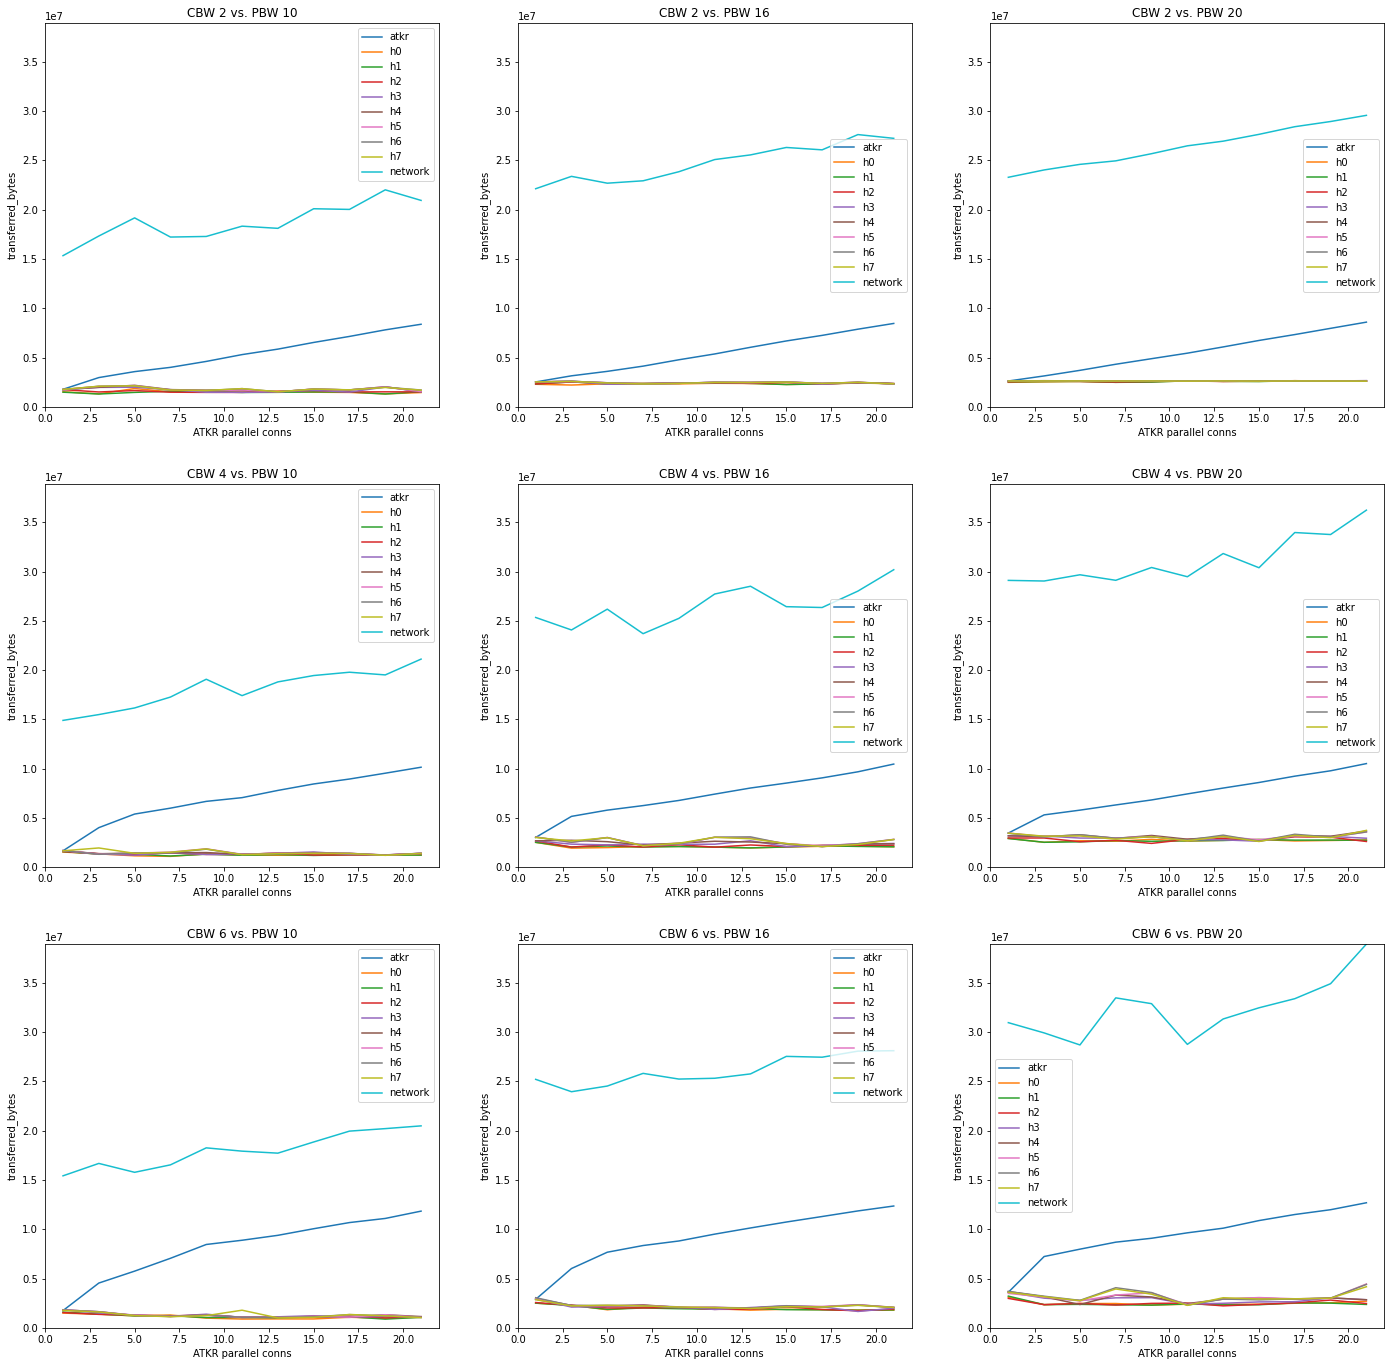

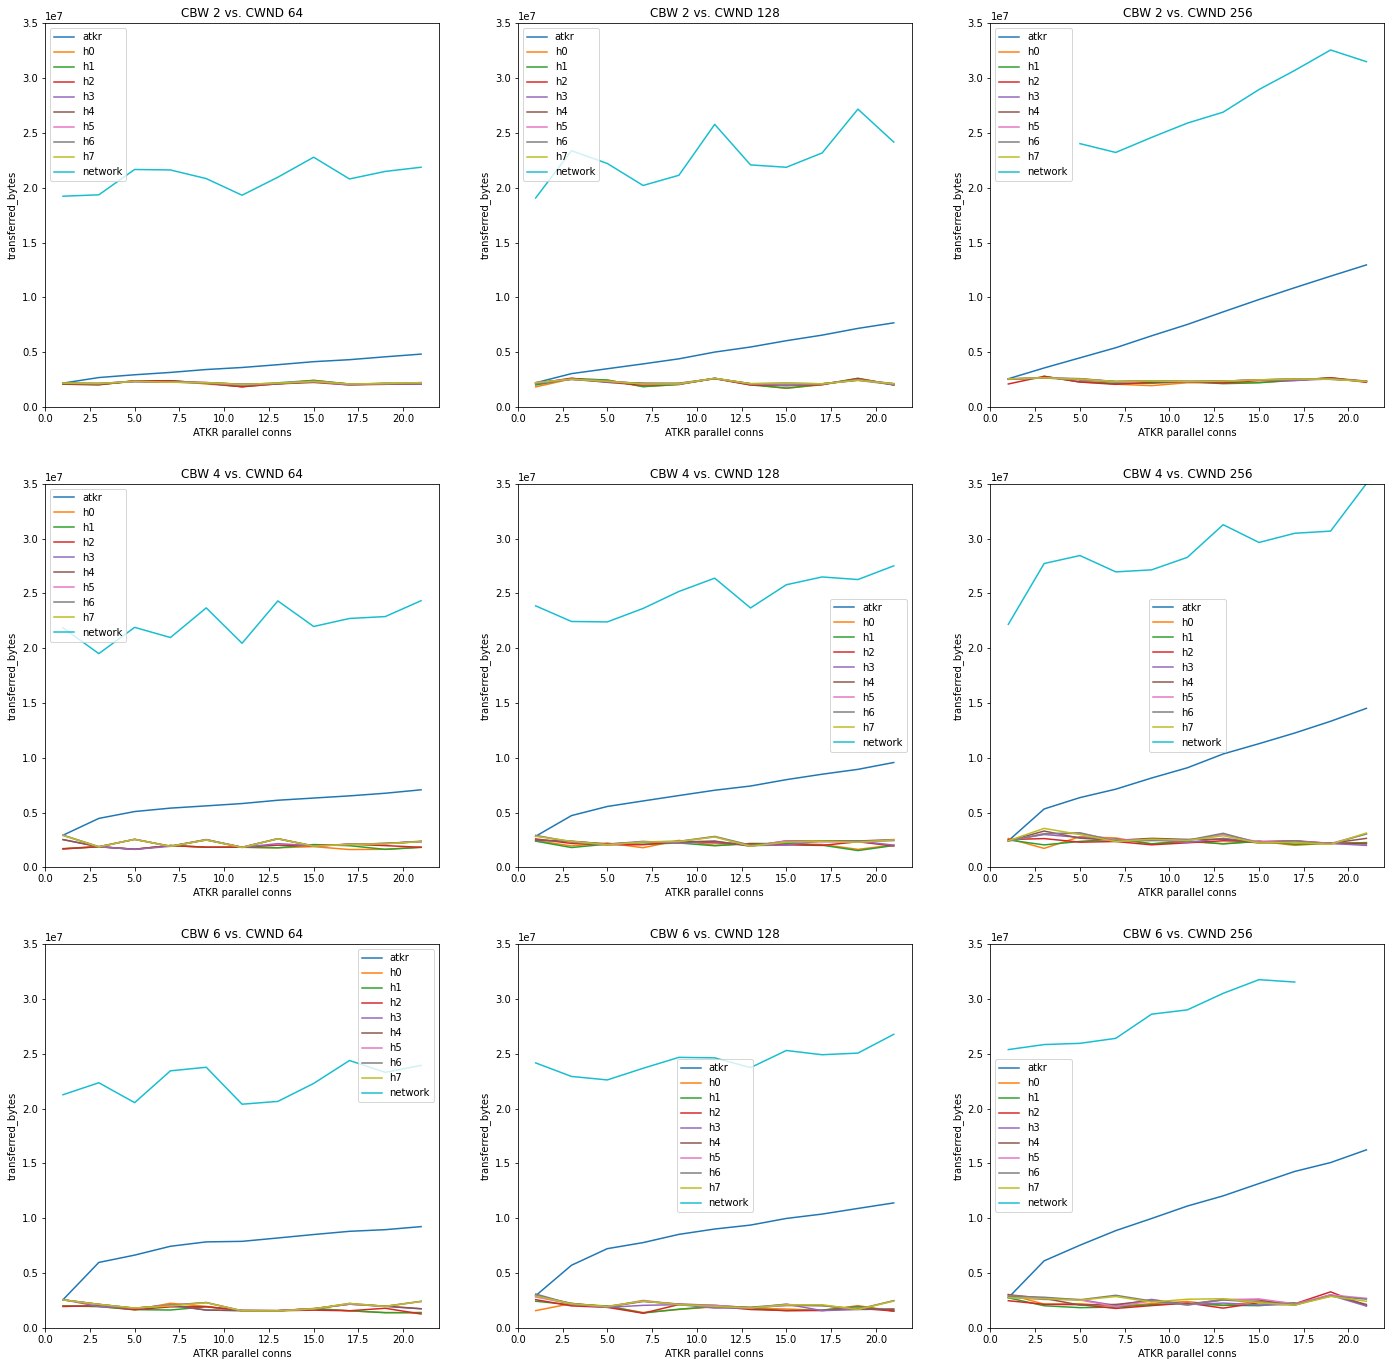

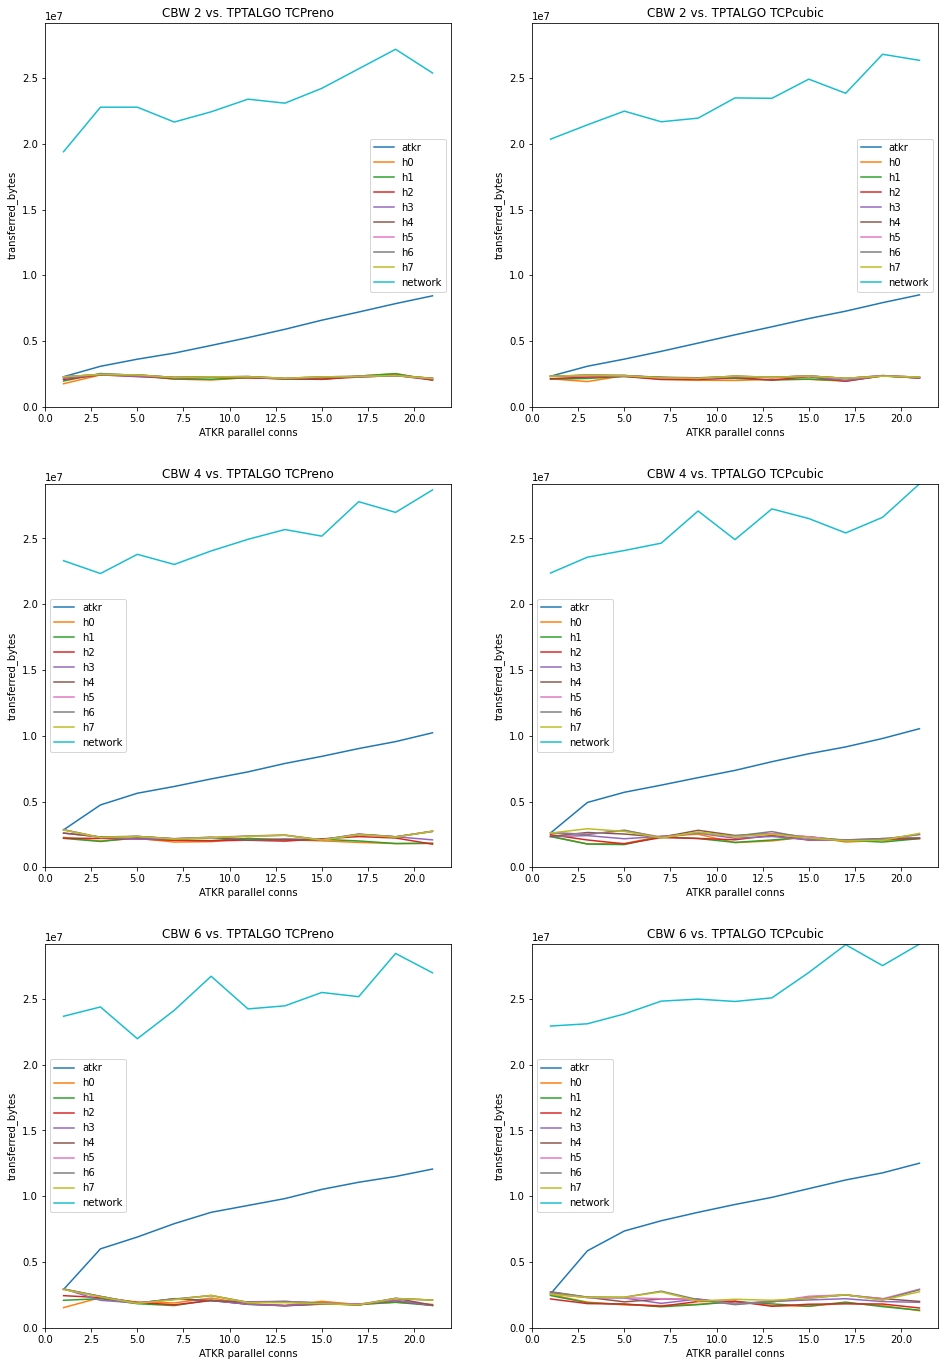

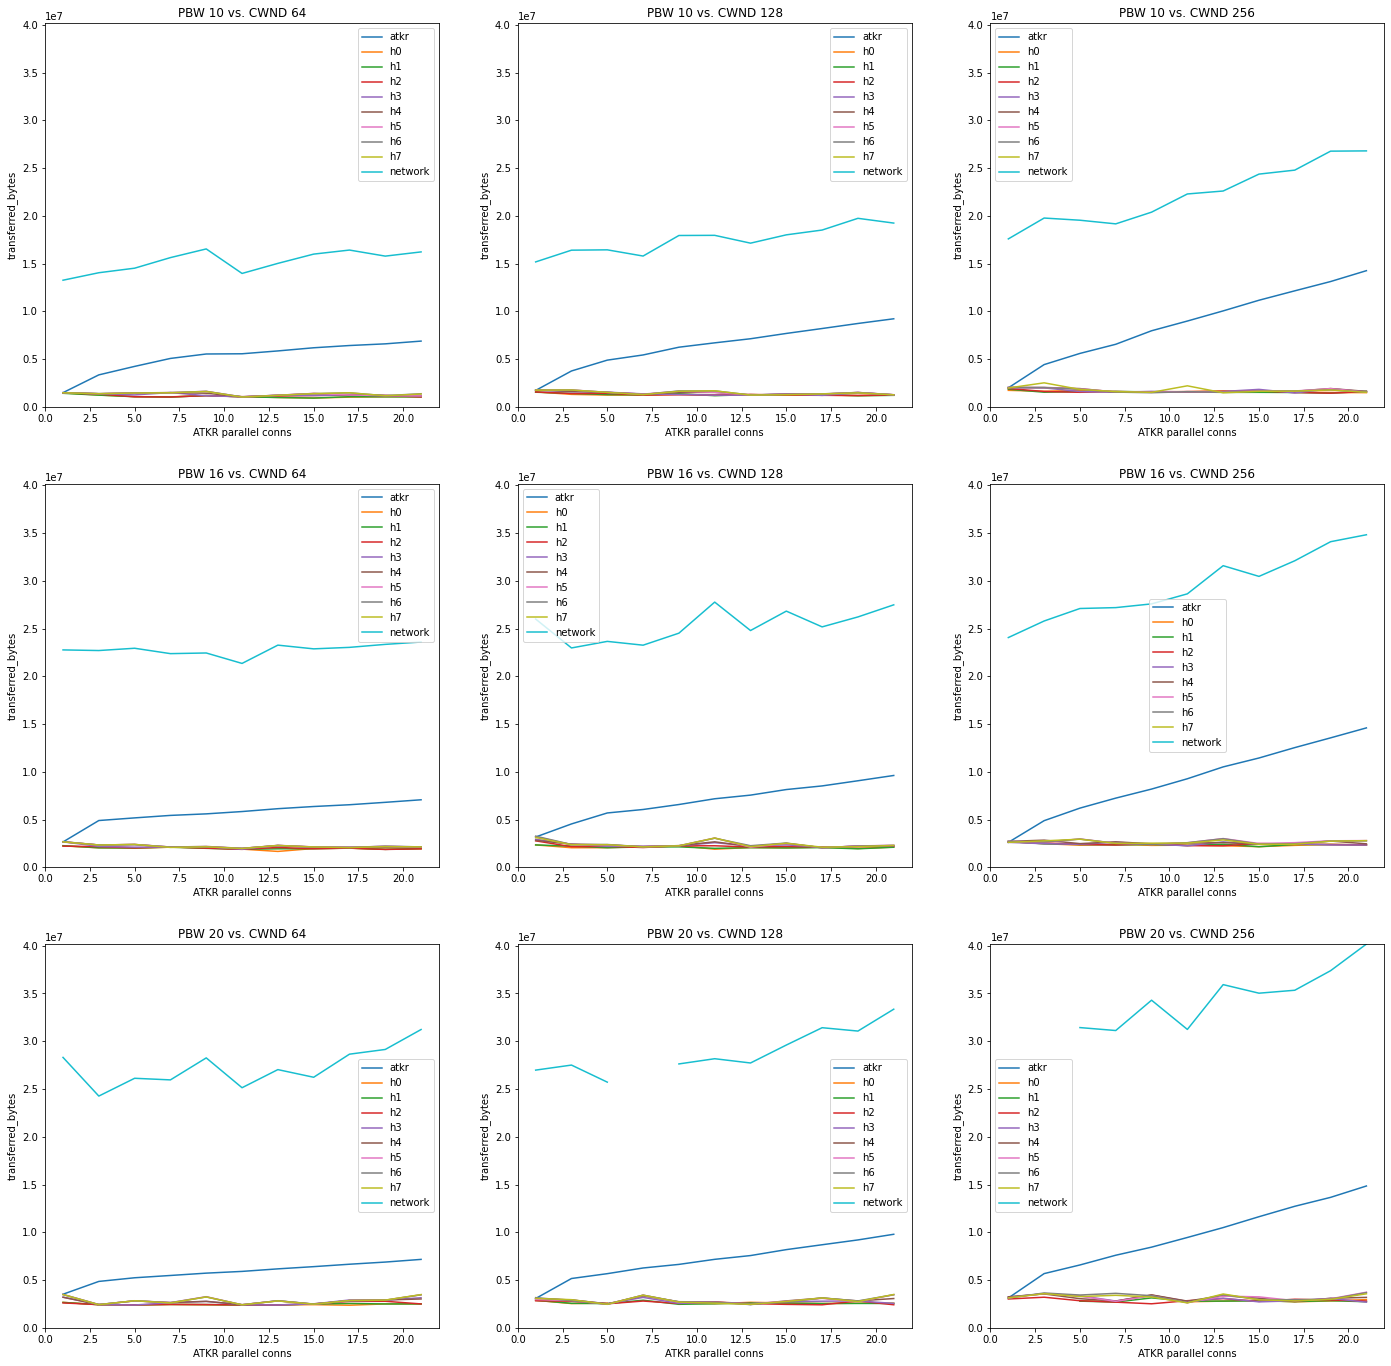

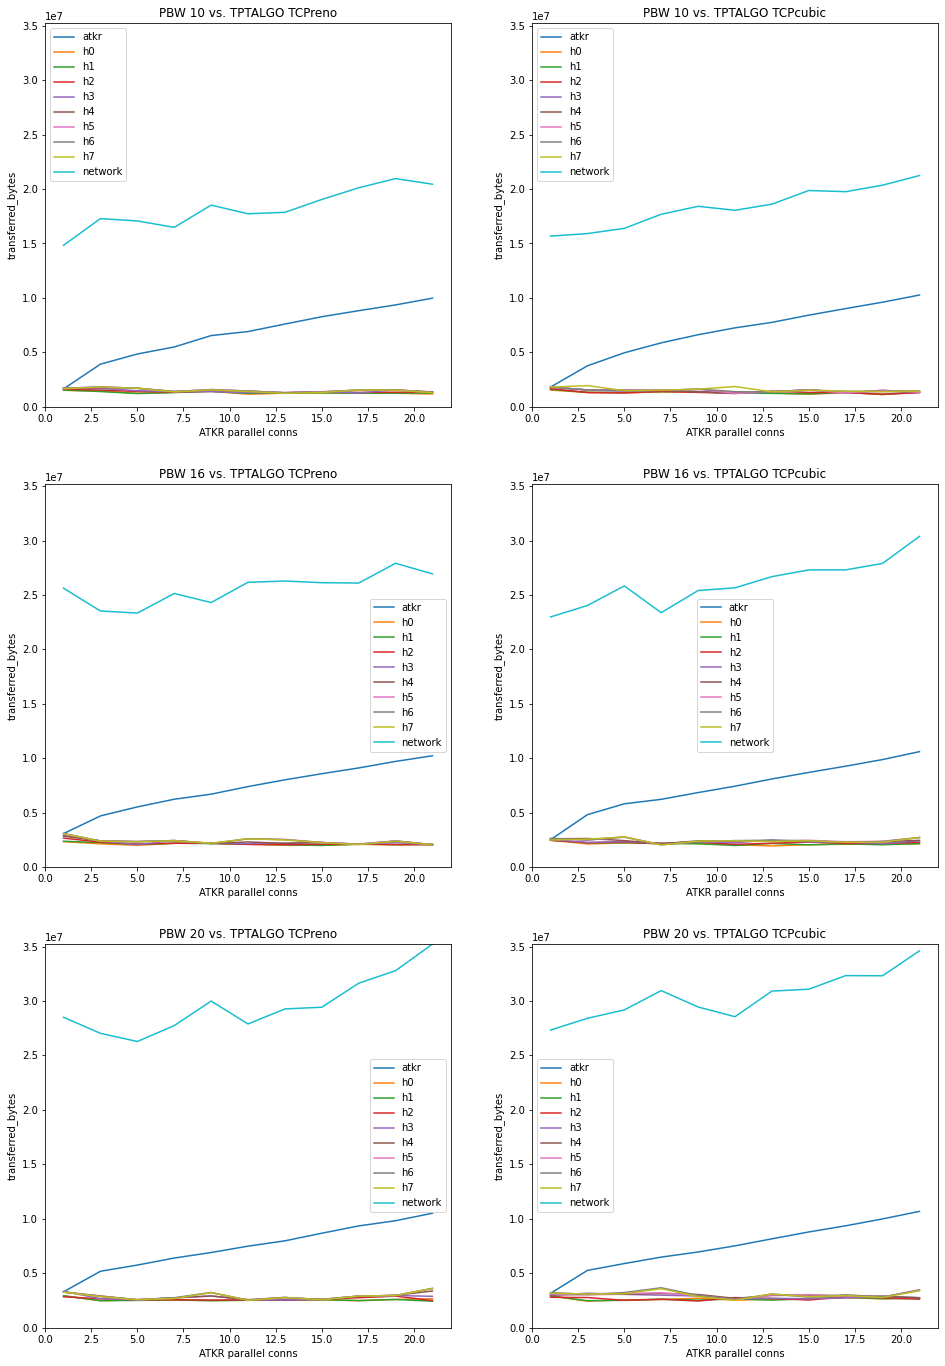

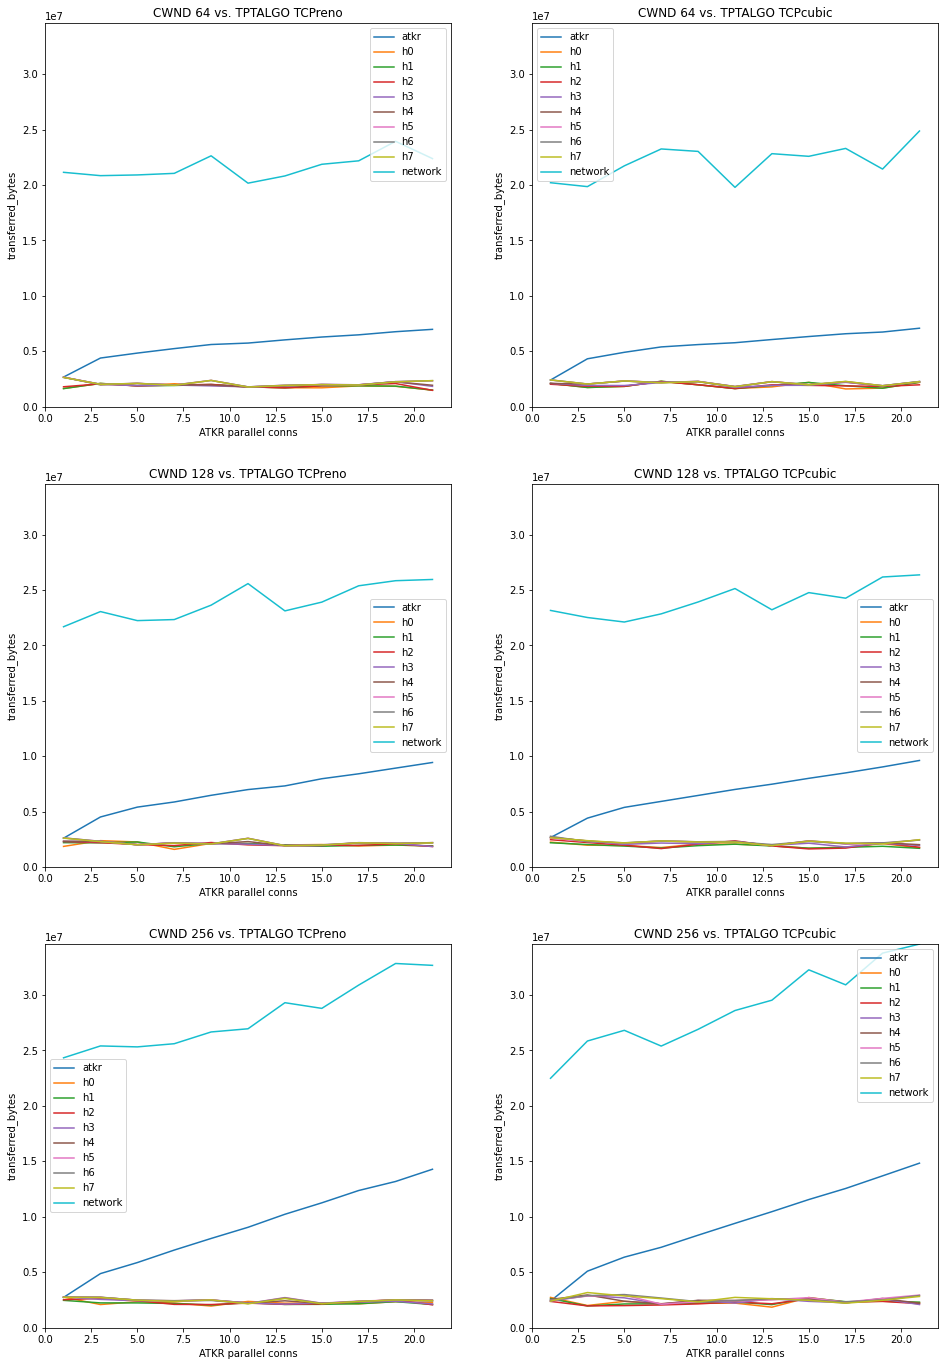

In [82]:
SCALAR_FIG_SZ = 8

for indeX in indices:
    for indeY in indices:
        if indices.index(indeX) >= indices.index(indeY): continue
        AX_R_NAME, AX_R_VALS = indeX
        AX_C_NAME, AX_C_VALS = indeY
        AX_R_LEN , AX_C_LEN  = len(AX_R_VALS), len(AX_C_VALS)
        print(f'{AX_R_LEN} x {AX_C_LEN}\t', AX_R_NAME, '\tvs.  ', AX_C_NAME)
        
        fig, axs = plt.subplots(AX_R_LEN, AX_C_LEN, figsize=(AX_C_LEN*SCALAR_FIG_SZ, AX_R_LEN*SCALAR_FIG_SZ))
        
        maxY = 0
        for R_VAL in AX_R_VALS:
            df0 = dfbigboi[dfbigboi[AX_R_NAME] == R_VAL]
            for C_VAL in AX_C_VALS:
                df1 = df0[df0[AX_C_NAME] == C_VAL]
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                
                net_data = [0] * len(ATK_PARA)
                for HOST in hostnames:
                    df2 = df1[df1['host'] == HOST]
                    host_data = []
                    for APC in ATK_PARA:
                        df3 = df2[df2['APC'] == APC]
                        host_total = df3.sum()['transferred_bytes'] // df3.shape[0]
                        host_data.append(host_total)
                        net_data[ATK_PARA.index(APC)] += host_total
                    maxY = max(maxY, max(host_data), max(net_data))
                    axi.plot(ATK_PARA, host_data, label=HOST)
                axi.plot(ATK_PARA, net_data, label='network')
                axi.legend()
                axi.set_xlabel('ATKR parallel conns')
                axi.set_ylabel('transferred_bytes')
                axi.set_title(f'{AX_R_NAME} {R_VAL} vs. {AX_C_NAME} {C_VAL}')
                
        for R_VAL in AX_R_VALS:
            for C_VAL in AX_C_VALS:
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                axi.set_ylim(bottom=0, top=maxY)

        fig.savefig(f'VIZ_{AX_R_NAME}-{AX_C_NAME}.png')